# Week3_授業前課題1_アヤメの分析

「フィッシャーのアヤメ」という機械学習やデータ分析の世界で有名なデータセットを使い、基本的なデータの扱い方を学んでいきます。

これはカナダのガスペ半島のある牧草地で同じ日に採取された以下の3種類のアヤメ、合計150本のデータです。

- [Iris setosa - Wikipedia](https://en.wikipedia.org/wiki/Iris_setosa)
- [Iris virgicolor - Wikipedia](https://en.wikipedia.org/wiki/Iris_versicolor)
- [Iris virginica - Wikipedia](https://en.wikipedia.org/wiki/Iris_virginica)

setosa、virgiclor、virginicaはここで 目的変数 や ラベル と呼ばれるものに当たります。

1本ごとにsepal_length（がく片の長さ）, sepal_width（がく片の幅）, petal_length（花弁の長さ）, petal_width（花弁の幅）の4種類の情報が記録されています。この4種類を 特徴量 と呼びます。

scikit-learnという機械学習ライブラリにはirisデータセットが用意されているため、これを使用します。

## 【問題1】データの取得
以下のドキュメントを参考にしながら、irisデータセット読み込みましょう。

[sklearn.datasets.load_iris — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)

データが読み込めたら、説明変数を下のようなPandasのDataFrame型変数Xに格納してください。列の名前も以下を参考にしてください。

[pandas.DataFrame — pandas 0.24.2 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)

目的変数も同様にyに格納してください。

In [1]:
from sklearn.datasets import load_iris
data = load_iris()
data.keys(), data.target_names, data.feature_names

(dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']),
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

In [2]:
import pandas as pd
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = pd.DataFrame(data.data, columns=names)
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
y = pd.DataFrame(data.target,  columns=['Species'])
y

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


## 【問題2】データの結合
問題1で準備した`X,y`を結合させたDataFrame型変数`df`を作成してください。結合することで扱いやすくなります。これ以降はこの`df`を使っていきます。

[Merge, join, and concatenate — pandas 0.24.2 documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)

[pandas.concat — pandas 0.24.2 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)

In [4]:
df = pd.concat([X, y], axis=1)
df

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## 【問題3】データの確認
今回扱うデータがどのようなものなのかを確認します。以下の4つを行ってください。

- 先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）
- ラベルごとのサンプル数の合計を出力する。
- 特徴量に欠損値があるかを確認する。
- 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

DataFrameのメソッドである.`head(),.info(),.describe(),.isnull(),.sum()`や、Seriesのメソッドである`.value_counts`などを使ってみましょう。

[pandas.DataFrame.head — pandas 0.25.3 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html)

[pandas.DataFrame.info — pandas 0.25.3 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html)

[pandas.DataFrame.describe — pandas 0.25.3 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)

[pandas.DataFrame.isnull — pandas 0.25.3 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html)

[pandas.DataFrame.sum — pandas 0.25.3 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html)

[pandas.Series.value_counts — pandas 0.25.3 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)

In [5]:
# 先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）
df.head(4)

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0


In [6]:
# ラベルごとのサンプル数の合計を出力する。
df.Species.value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

In [7]:
# 特徴量に欠損値があるかを確認する。
df.isnull().sum()
# 欠損値はなし

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Species         0
dtype: int64

In [8]:
# 特徴量の平均値と標準偏差、四分位数を一度に表示させる。
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
# 特徴量の平均値と標準偏差、四分位数を一度に表示させる。
df.describe().iloc[[1, 3, 4, 5, 6], :-1]

,sepal_length,sepal_width,petal_length,petal_width
mean,5.843333,3.057333,3.758,1.199333
min,4.300000,2.000000,1.000,0.100000
25%,5.100000,2.800000,1.600,0.300000
50%,5.800000,3.000000,4.350,1.300000
75%,6.400000,3.300000,5.100,1.800000


## 【問題4】irisデータセット自体の調査
ページのはじめで「カナダのガスペ半島のある牧草地で」と書きましたが、データセット自体についてもう少し調査しておきましょう。データセットを見る上で、そのデータセット自体について知っておくことも大切です。

- 1936年に統計、生物学者であるRonald Fisherの「The use of multiple measurements in taxonomic problems (分類問題における複数箇所の測定の使用) 」という論文に掲載されたデータセット(データの集まり)
![image](http://suruchifialoke.com/img/ML/iris.png)
画像引用 [Classification of Iris Varieties](http://suruchifialoke.com/2016-10-13-machine-learning-tutorial-iris-classification/)

## 【問題5】必要なデータを抽出
DataFrameから必要なデータを抽出する方法を確認していきます。以下を行ってください。

- `sepal_width`の列を３つの異なる方法で抽出する
- `50番目から99番目まで`のデータを抽出する
- `petal_length`の列の`50番目から99番目`までのデータを抽出する
- `petal_width`の値が`0.2`のデータを抽出する

`.loc`や`.iloc`を使うことになります。この２つはどう違うのかについて説明してください。

In [10]:
# sepal_widthの列を３つの異なる方法で抽出する
df.sepal_width

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [11]:
df['sepal_width']

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [12]:
df.loc[:, 'sepal_width']

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [13]:
df.iloc[:, 1]

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [14]:
# 50番目から99番目までのデータを抽出する
df[50:100]

,sepal_length,sepal_width,petal_length,petal_width,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


In [15]:
# petal_lengthの列の50番目から99番目までのデータを抽出する
df.loc[50:100, 'petal_length']
df.iloc[50:100, 2]

50    4.7
51    4.5
52    4.9
53    4.0
54    4.6
55    4.5
56    4.7
57    3.3
58    4.6
59    3.9
60    3.5
61    4.2
62    4.0
63    4.7
64    3.6
65    4.4
66    4.5
67    4.1
68    4.5
69    3.9
70    4.8
71    4.0
72    4.9
73    4.7
74    4.3
75    4.4
76    4.8
77    5.0
78    4.5
79    3.5
80    3.8
81    3.7
82    3.9
83    5.1
84    4.5
85    4.5
86    4.7
87    4.4
88    4.1
89    4.0
90    4.4
91    4.6
92    4.0
93    3.3
94    4.2
95    4.2
96    4.2
97    4.3
98    3.0
99    4.1
Name: petal_length, dtype: float64

In [16]:
# petal_widthの値が0.2のデータを抽出する
df[df.petal_width == 0.2]

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
14,5.8,4.0,1.2,0.2,0


##### .locや.ilocを使うことになります。この２つはどう違うのかについて説明してください。
- .loc　行、列の`ラベル名`を指定する必要がある
- .iloc 行、列の`番号`を指定する必要がある

## 【問題6】図の作成
データは可視化して確認することが大切です。次の3つを行ってください。作図のライブラリはMatplotlibの他seabornもよく使われます。

- ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）
- 特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する
- 特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する

箱ひげ図とバイオリン図は似た図を表示します。これらはどう違い、それぞれどのような利点があるのかについて説明してください。

/Users/ikeda/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


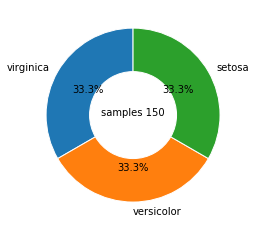

In [17]:
## ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.text(0, 0, 'samples 150', ha='center')
ax1.pie(df.Species.value_counts(),
        labels=data.target_names[df.Species.value_counts().index],
        wedgeprops=dict(width=0.5, edgecolor='w'),
        autopct='%1.1f%%', counterclock=True, startangle=90);

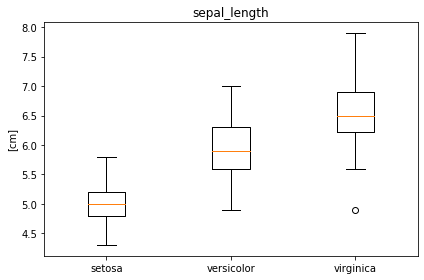

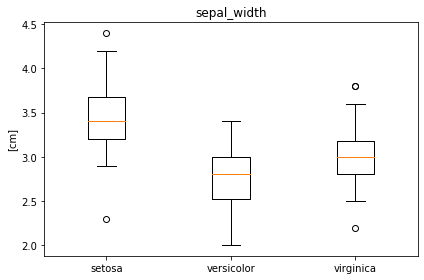

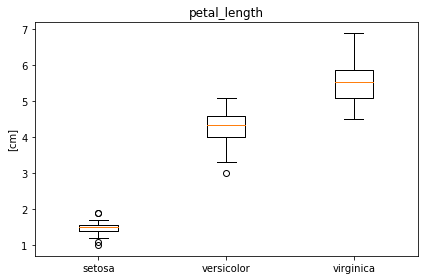

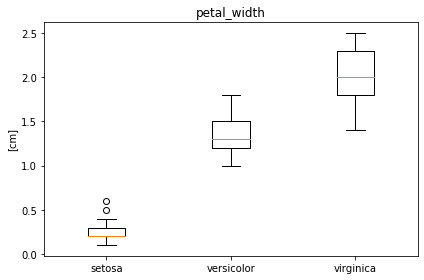

In [18]:
## 特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する
for name in names:
    fig, ax = plt.subplots()
    data_0 = df[df.Species==0][name]
    data_1 = df[df.Species==1][name]
    data_2 = df[df.Species==2][name]
    ax.boxplot([data_0, data_1, data_2], whis=1.5)
    ax.set_title(name)
    ax.set_ylabel('[cm]')
    ax.set_xticklabels(data.target_names)
    fig.tight_layout()

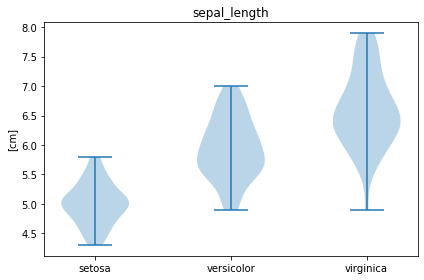

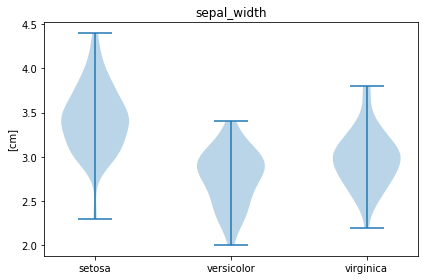

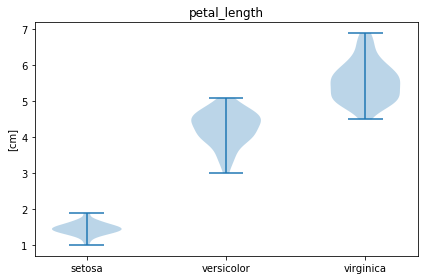

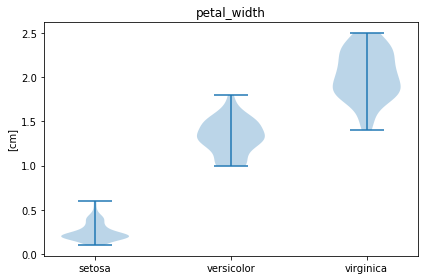

In [19]:
# 特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する
for name in names:
    fig, ax = plt.subplots()
    data_0 = df[df.Species==0][name]
    data_1 = df[df.Species==1][name]
    data_2 = df[df.Species==2][name]
    ax.violinplot([data_0, data_1, data_2])
    ax.set_title(name)
    ax.set_ylabel('[cm]')
    ax.set_xticks([1, 2, 3])
    ax.set_xticklabels(data.target_names)
    fig.tight_layout()

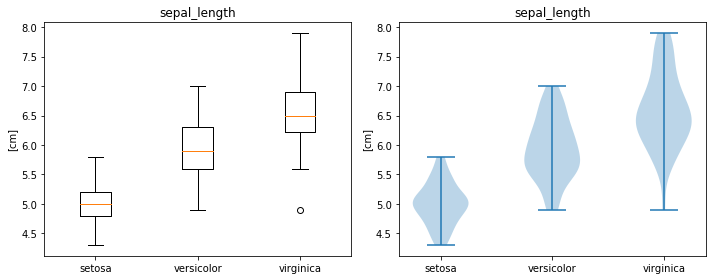

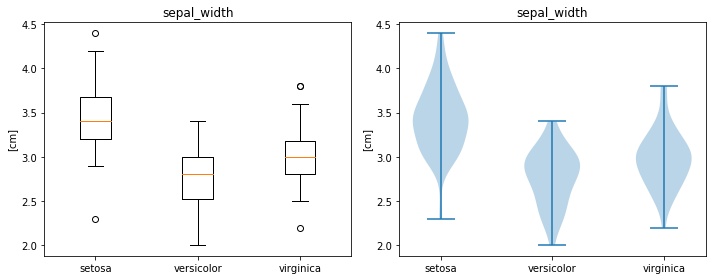

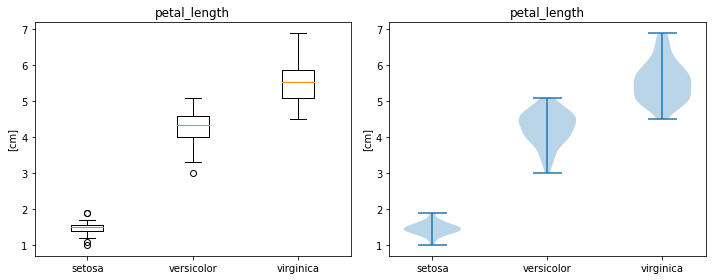

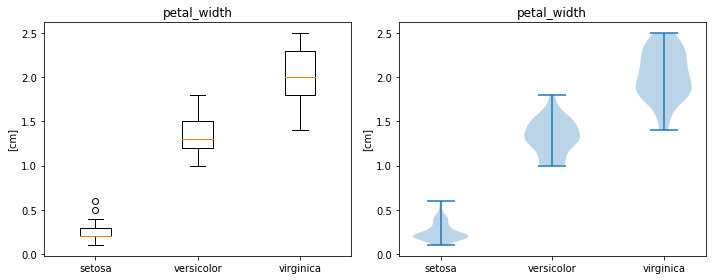

In [20]:
for name in names:
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    data_0 = df[df.Species==0][name]
    data_1 = df[df.Species==1][name]
    data_2 = df[df.Species==2][name]
    ax[0].boxplot([data_0, data_1, data_2], whis=1.5)
    ax[0].set_title(name)
    ax[0].set_ylabel('[cm]')
    ax[0].set_xticklabels(data.target_names)
    ax[1].violinplot([data_0, data_1, data_2])
    ax[1].set_title(name)
    ax[1].set_ylabel('[cm]')
    ax[1].set_xticks([1, 2, 3])
    ax[1].set_xticklabels(data.target_names)
    fig.tight_layout()

##### 箱ひげ図とバイオリン図は似た図を表示します。これらはどう違い、それぞれどのような利点があるのかについて説明してください。
- 箱ひげ図は、四分位数等の要約統計量のみを表示するのに対し、バイオリン図は全ての分布データが含まれる
- データに複数のピークがある場合、バイオリンずでは明確に表現されるが、箱ひげ図では表現されない
- バイオリン図は箱ひげ図より多くの情報が含まれるが、知名度が低いことが欠点

## 【問題7】特徴量間の関係の確認
特徴量間の関係を見ていきます。次の4つを行ってください。

- 縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る
- 全ての組み合わせの散布図を一度に表示させる、散布図行列を作る
- ４つの特徴量に関する相関係数行列を作る
- 相関係数行列のヒートマップを作る

相関係数行列はDataFrameの`corr()`メソッドを使うことで求められます。

[pandas.DataFrame.corr — pandas 0.24.2 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)

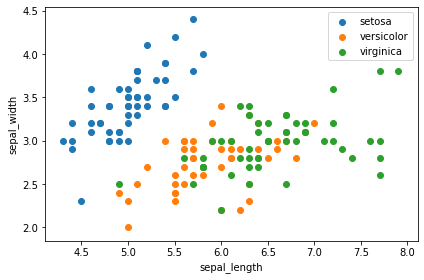

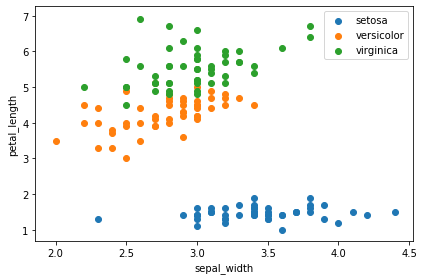

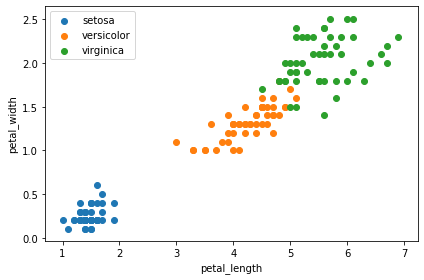

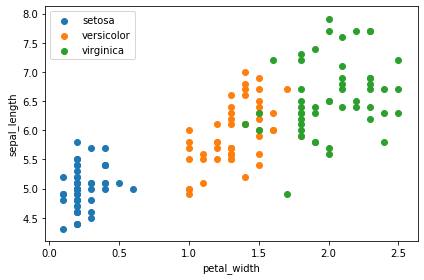

In [21]:
# 縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る
names2 = names[1:]+[names[0]]
for x, y in zip(names, names2):
    fig, ax = plt.subplots()
    for label in range(3):
        ax.scatter(df[df.Species == label][x], df[df.Species == label][y])
        ax.set_xlabel(x)
        ax.set_ylabel(y)
    ax.legend(data.target_names)
    fig.tight_layout();

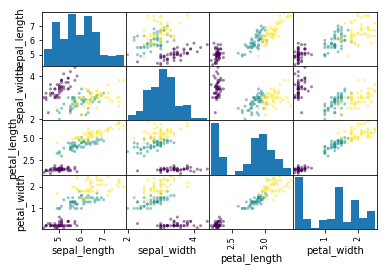

In [22]:
# 全ての組み合わせの散布図を一度に表示させる、散布図行列を作る
pd.plotting.scatter_matrix(df.iloc[:, :-1], c=data.target);

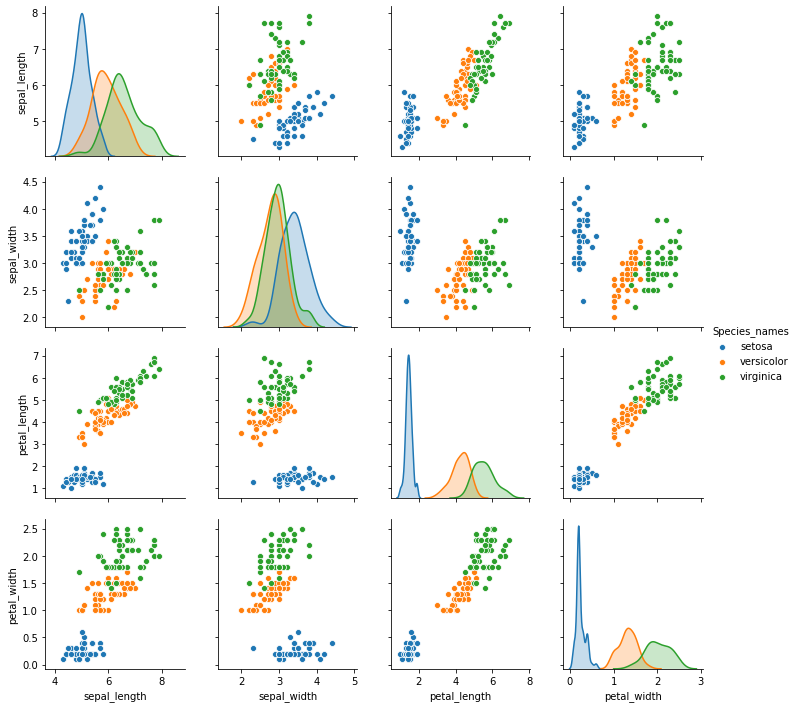

In [23]:
df2 = df.copy()
df2['Species_names'] = data.target_names[df2['Species']]
sns.pairplot(df2, hue='Species_names', vars=names);

In [24]:
# ４つの特徴量に関する相関係数行列を作る
corr_matrix = df.iloc[:, :-1].corr()
corr_matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


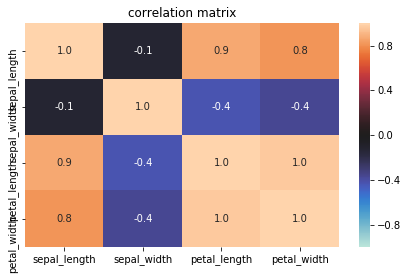

In [25]:
# 相関係数行列のヒートマップを作る
sns.heatmap(corr_matrix,
            vmin=-1.0, 
            vmax=1.0, 
            center=0,
            annot=True,
            fmt='.1f',
            )
plt.ylim(4, 0)
plt.title('correlation matrix')
plt.tight_layout()
plt.show();

## 【問題8】可視化したグラフや表の結果の説明
データを探索した時には、結果を述べる（+考察する）ことが大切です。ここまでで作成した表や図から読み取れることや気づきを説明してください。

例えば、散布図行列を見ながら、3種類のアヤメにはどのような違いがあるかを説明してください。

- setosaは4つの特徴量の内、がくの長さ、花弁の長さ、花弁の幅の３つについては、他の２種類と比較して数値が小さくなる傾向。
    - 特に花弁の長さ、花弁の幅については他の２種とほとんど重なりが見られない
- verginicaは花弁の長さ、花弁の幅については、他の二種より大きくなっている
- がくの長さ、花弁の長さ、花弁の幅の３つの特徴量間で相関が強く出ており、それぞれの変数にて、setosa < versicolor < verginica であると推定される